In [1]:
import pandas as pd
import numpy as np

# Timestamp Object

A Timestamp is a type of datetime-like object that represents a single point in time. It is Pandas' equivalent of Python’s datetime.datetime, but with more features optimized for time series.

## Creating Timestamp objects

In [2]:
pd.Timestamp("2025-7-18")

Timestamp('2025-07-18 00:00:00')

We didnt give time thats why it gives 00:00:00

In [3]:
type(pd.Timestamp("2025-7-18"))

pandas._libs.tslibs.timestamps.Timestamp

### Variations
Pandas is intelligent so it can understand the time in other formats

In [4]:
pd.Timestamp("2025/7/18")

Timestamp('2025-07-18 00:00:00')

In [5]:
pd.Timestamp("2025, 7, 18")

Timestamp('2025-07-18 00:00:00')

#### Only year

In [6]:
pd.Timestamp("2025")

Timestamp('2025-01-01 00:00:00')

#### Using texts

In [7]:
pd.Timestamp("18 July 2025")

Timestamp('2025-07-18 00:00:00')

### Providing Time also

In [8]:
pd.Timestamp("2025-7-18 6:36:49")

Timestamp('2025-07-18 06:36:49')

In [9]:
pd.Timestamp("2025, 7, 18 6:36:49")

Timestamp('2025-07-18 06:36:49')

In [10]:
pd.Timestamp("18th Jul 2025 6:38")

Timestamp('2025-07-18 06:38:00')

#### AM and PM

In [11]:
pd.Timestamp("18th Jul 2025 6:38AM")

Timestamp('2025-07-18 06:38:00')

In [12]:
pd.Timestamp("18th Jul 2025 6:38PM")

Timestamp('2025-07-18 18:38:00')

# datetime.datetime object of Python

## Creating datetime.datetime objects

The datetime module in Python is used to work with dates and times — such as current date, future/past dates, formatting, and differences between dates.



In [13]:
import datetime as dt
dt.datetime(2025,7,18,6,42,45)

datetime.datetime(2025, 7, 18, 6, 42, 45)

In [14]:
type(dt.datetime(2025,7,18,6,42,45))

datetime.datetime

## Making Timestamp object using datetime.dtaetime object

In [15]:
x = pd.Timestamp(dt.datetime(2025,7,18,6,42,45))
x

Timestamp('2025-07-18 06:42:45')

## Fetching

### Year

In [16]:
x.year

2025

### Month

In [17]:
x.month

7

### Day

In [18]:
x.day

18

### Hour

In [19]:
x.hour

6

### Minute

In [20]:
x.minute

42

### Second

In [21]:
x.second

45

## Why separate objects to handle date and time when python have already datetime functionality?
* syntax wise datetime is very convenient
* But the performance takes a hit while working with huge data. List vs Numpy Array
* The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
* The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

**Numpy date can support vectorized operations and also it takes strings for lesser space and readibility**

In [22]:
date = np.array("2025-07-18",dtype=np.datetime64)
date

array('2025-07-18', dtype='datetime64[D]')

In [23]:
#vectorized operation
date + np.arange(20)

array(['2025-07-18', '2025-07-19', '2025-07-20', '2025-07-21',
       '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25',
       '2025-07-26', '2025-07-27', '2025-07-28', '2025-07-29',
       '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-02',
       '2025-08-03', '2025-08-04', '2025-08-05', '2025-08-06'],
      dtype='datetime64[D]')

* Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large
* Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64
* From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

# DatetimeIndex Object
A DatetimeIndex is a special type of index in Pandas that is optimized for date/time-based indexing and time series operations. A collection of timestamp.

 It allows you to:
- Filter data by year, month, day, etc.
- Resample time series
- Easily handle date/time-based slicing



## Creating DateTimeIndex Object

### Using strings

In [24]:
index = pd.DatetimeIndex(["2025-7-11","2025-7-12","2025-7-13","2025-7-14"])
index

DatetimeIndex(['2025-07-11', '2025-07-12', '2025-07-13', '2025-07-14'], dtype='datetime64[ns]', freq=None)

In [25]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [26]:
index[0]

Timestamp('2025-07-11 00:00:00')

**To prove it is a collection of Timestamp objects**

In [27]:
type(index[0])

pandas._libs.tslibs.timestamps.Timestamp

### Using python datetime objects

In [28]:
pd.DatetimeIndex([dt.datetime(2025,7,11),dt.datetime(2025,7,12),dt.datetime(2025,7,13),dt.datetime(2025,7,14)])

DatetimeIndex(['2025-07-11', '2025-07-12', '2025-07-13', '2025-07-14'], dtype='datetime64[ns]', freq=None)

### Using pd.Timestamp objects

In [29]:
pd.DatetimeIndex([pd.Timestamp(2025,7,11),pd.Timestamp(2025,7,12),pd.Timestamp(2025,7,13),pd.Timestamp(2025,7,14)])

DatetimeIndex(['2025-07-11', '2025-07-12', '2025-07-13', '2025-07-14'], dtype='datetime64[ns]', freq=None)

## Using DatetimeIndex object as Series index

In [30]:
ser = pd.Series([1,2,4,8],index=index)
ser

2025-07-11    1
2025-07-12    2
2025-07-13    4
2025-07-14    8
dtype: int64

In [31]:
ser["2025"]

2025-07-11    1
2025-07-12    2
2025-07-13    4
2025-07-14    8
dtype: int64

In [32]:
ser["2025/7"]

2025-07-11    1
2025-07-12    2
2025-07-13    4
2025-07-14    8
dtype: int64

In [33]:
ser["2025-7"]

2025-07-11    1
2025-07-12    2
2025-07-13    4
2025-07-14    8
dtype: int64

In [34]:
ser["2025, 7"]

2025-07-11    1
2025-07-12    2
2025-07-13    4
2025-07-14    8
dtype: int64

In [35]:
ser["2025-07-14"]

8

# date_range Function

### Genreate daily dates in a given range

In [36]:
pd.date_range(start="2025-01-01",end="2025-01-31",freq="D")

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='D')

### Genreate alternate dates in a given range

In [37]:
pd.date_range("2025-01-01","2025-01-31",freq="2D")

DatetimeIndex(['2025-01-01', '2025-01-03', '2025-01-05', '2025-01-07',
               '2025-01-09', '2025-01-11', '2025-01-13', '2025-01-15',
               '2025-01-17', '2025-01-19', '2025-01-21', '2025-01-23',
               '2025-01-25', '2025-01-27', '2025-01-29', '2025-01-31'],
              dtype='datetime64[ns]', freq='2D')

### B -> Business days

In [38]:
pd.date_range("2025-01-01","2025-01-31",freq="B")

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='B')

### W -> Weekly

In [39]:
pd.date_range("2025-01-01","2025-01-31",freq="W")

DatetimeIndex(['2025-01-05', '2025-01-12', '2025-01-19', '2025-01-26'], dtype='datetime64[ns]', freq='W-SUN')

All these days are sundays, if we don't want sundays we could do freq ="W-MON" MON,TUE,WED,THU,FRI,SAT,SUN

In [40]:
pd.date_range("2025-01-01","2025-01-31",freq="W-THU")

DatetimeIndex(['2025-01-02', '2025-01-09', '2025-01-16', '2025-01-23',
               '2025-01-30'],
              dtype='datetime64[ns]', freq='W-THU')

### H -> Hourly data

In [41]:
pd.date_range("2025-01-01","2025-01-31",freq="H")

C:\Users\AK\AppData\Local\Temp\ipykernel_8380\806110793.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2025-01-01","2025-01-31",freq="H")


DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-30 15:00:00', '2025-01-30 16:00:00',
               '2025-01-30 17:00:00', '2025-01-30 18:00:00',
               '2025-01-30 19:00:00', '2025-01-30 20:00:00',
               '2025-01-30 21:00:00', '2025-01-30 22:00:00',
               '2025-01-30 23:00:00', '2025-01-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='h')

In [42]:
pd.date_range("2025-01-01","2025-01-31",freq="6h")

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 06:00:00',
               '2025-01-01 12:00:00', '2025-01-01 18:00:00',
               '2025-01-02 00:00:00', '2025-01-02 06:00:00',
               '2025-01-02 12:00:00', '2025-01-02 18:00:00',
               '2025-01-03 00:00:00', '2025-01-03 06:00:00',
               ...
               '2025-01-28 18:00:00', '2025-01-29 00:00:00',
               '2025-01-29 06:00:00', '2025-01-29 12:00:00',
               '2025-01-29 18:00:00', '2025-01-30 00:00:00',
               '2025-01-30 06:00:00', '2025-01-30 12:00:00',
               '2025-01-30 18:00:00', '2025-01-31 00:00:00'],
              dtype='datetime64[ns]', length=121, freq='6h')

### ME or M -> month end

In [43]:
pd.date_range("2025-01-01","2025-01-31",freq="ME")

DatetimeIndex(['2025-01-31'], dtype='datetime64[ns]', freq='ME')

### MS -> month start

In [44]:
pd.date_range("2025-01-01","2025-01-31",freq="MS")

DatetimeIndex(['2025-01-01'], dtype='datetime64[ns]', freq='MS')

### Y or A or YE -> year end

In [45]:
pd.date_range("2025-01-01","2025-01-31",freq="A")

C:\Users\AK\AppData\Local\Temp\ipykernel_8380\326072701.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range("2025-01-01","2025-01-31",freq="A")


DatetimeIndex([], dtype='datetime64[ns]', freq='YE-DEC')

In [46]:
pd.date_range("2025-01-01","2025-01-31",freq="Y")

C:\Users\AK\AppData\Local\Temp\ipykernel_8380\71727386.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range("2025-01-01","2025-01-31",freq="Y")


DatetimeIndex([], dtype='datetime64[ns]', freq='YE-DEC')

In [47]:
pd.date_range("2025-01-01","2025-01-31",freq="YE")

DatetimeIndex([], dtype='datetime64[ns]', freq='YE-DEC')

### YS or AS -> year start

In [48]:
pd.date_range("2025-01-01","2025-01-31",freq="AS")

C:\Users\AK\AppData\Local\Temp\ipykernel_8380\949387882.py:1: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pd.date_range("2025-01-01","2025-01-31",freq="AS")


DatetimeIndex(['2025-01-01'], dtype='datetime64[ns]', freq='YS-JAN')

In [49]:
pd.date_range("2025-01-01","2025-01-31",freq="YS")

DatetimeIndex(['2025-01-01'], dtype='datetime64[ns]', freq='YS-JAN')

| Code             | Meaning       | Example                     |
| ---------------- | ------------- | --------------------------- |
| `"D"`            | Calendar day  | Daily data: 2023-01-01, 02… |
| `"B"`            | Business day  | Skips weekends              |
| `"H"`            | Hour          | 01:00, 02:00, …             |
| `"T"` or `"min"` | Minute        | 00:00, 00:01, …             |
| `"S"`            | Second        | 00:00:00, 00:00:01…         |
| `"W"`            | Weekly        | 2023-01-01, 2023-01-08…     |
| `"M"` or `"ME"`  | Month end     | 2023-01-31, 2023-02-28…     |
| `"MS"`           | Month start   | 2023-01-01, 2023-02-01…     |
| `"Q"`            | Quarter end   | Mar 31, Jun 30, Sep 30…     |
| `"QS"`           | Quarter start | Jan 1, Apr 1, Jul 1…        |
| `"A"` or `"Y"` or `"YE"`| Year end      | 2023-12-31, 2024-12-31…     |
| `"AS"` or `"YS"` | Year start    | 2023-01-01, 2024-01-01…     |


### Using periods (number of results)

In [50]:
pd.date_range("2025-01-01",periods=25,freq="D")

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range("2025-01-01",periods=25,freq="H")

C:\Users\AK\AppData\Local\Temp\ipykernel_8380\454904311.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2025-01-01",periods=25,freq="H")


DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               '2025-01-01 10:00:00', '2025-01-01 11:00:00',
               '2025-01-01 12:00:00', '2025-01-01 13:00:00',
               '2025-01-01 14:00:00', '2025-01-01 15:00:00',
               '2025-01-01 16:00:00', '2025-01-01 17:00:00',
               '2025-01-01 18:00:00', '2025-01-01 19:00:00',
               '2025-01-01 20:00:00', '2025-01-01 21:00:00',
               '2025-01-01 22:00:00', '2025-01-01 23:00:00',
               '2025-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='h')

In [52]:
pd.date_range("2025-01-01",periods=25,freq="ME")

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31',
               '2026-01-31', '2026-02-28', '2026-03-31', '2026-04-30',
               '2026-05-31', '2026-06-30', '2026-07-31', '2026-08-31',
               '2026-09-30', '2026-10-31', '2026-11-30', '2026-12-31',
               '2027-01-31'],
              dtype='datetime64[ns]', freq='ME')

## to_datetime() function

converts an existing object to pandas Timestamp or DatetimeIndex object

In [53]:
s = pd.Series(["2025-2-3","2025-2-4","2025-2-5"])
s

0    2025-2-3
1    2025-2-4
2    2025-2-5
dtype: object

In [54]:
s = pd.to_datetime(s)
s

0   2025-02-03
1   2025-02-04
2   2025-02-05
dtype: datetime64[ns]

In [55]:
s.dt.year

0    2025
1    2025
2    2025
dtype: int32

In [56]:
s.dt.month

0    2
1    2
2    2
dtype: int32

In [57]:
s.dt.day

0    3
1    4
2    5
dtype: int32

In [58]:
s.dt.month_name()

0    February
1    February
2    February
dtype: object

In [59]:
s.dt.day_name()

0       Monday
1      Tuesday
2    Wednesday
dtype: object

In [60]:
s.dt.is_leap_year

0    False
1    False
2    False
dtype: bool

In [61]:
s.dt.quarter

0    1
1    1
2    1
dtype: int32

So, **to_datetime() function** is used in such scenerios when the column holds date time values but in string not in datetime

### errors parameter

In [62]:
dt = pd.to_datetime(pd.Series(["2025-2-3","2025-2-4","2025-27-5"]))

ValueError: time data "2025-27-5" doesn't match format "%Y-%m-%d", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

To solve this, there is a parameter errors 

The errors parameter tells how pandas should behave when it encounters invalid date values.

In [63]:
dt = pd.to_datetime(pd.Series(["2025-2-3","2025-2-4","2025-27-5"]),errors="coerce")
dt

0   2025-02-03
1   2025-02-04
2          NaT
dtype: datetime64[ns]

NaT -> not a time like NaN

In [64]:
dt = pd.to_datetime(pd.Series(["2025-2-3","2025-2-4","2025-27-5"]),errors="ignore")
dt

C:\Users\AK\AppData\Local\Temp\ipykernel_8380\1288262862.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  dt = pd.to_datetime(pd.Series(["2025-2-3","2025-2-4","2025-27-5"]),errors="ignore")


0     2025-2-3
1     2025-2-4
2    2025-27-5
dtype: object

In [65]:
dt = pd.to_datetime(pd.Series(["2025-2-3","2025-2-4","2025-27-5"]),errors="raise")#default
dt

ValueError: time data "2025-27-5" doesn't match format "%Y-%m-%d", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

| Value      | What it does                                                       |
| ---------- | ------------------------------------------------------------------ |
| `'raise'`  | 🔥 **Raises an error** if any value can't be converted to datetime |
| `'coerce'` | 🧊 **Converts invalid values to `NaT`** (Not a Time)               |
| `'ignore'` | 🙈 **Returns input unchanged** if any invalid value is found       |


In [66]:
df = pd.read_csv("07/expense_data.csv")
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [68]:
df["Date"] = pd.to_datetime(df["Date"])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

the .dt accessor is used to access datetime properties of a Series with datetime64[ns] dtype (or datetime-like values such as Period, Timedelta, etc.).

In [70]:
df["Date"].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [71]:
df["Date"].dt.is_month_start

0      False
1      False
2       True
3       True
4       True
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [72]:
df["Date"].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [73]:
df["Date"].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

## Plotting Graphs

In [74]:
import matplotlib.pyplot as plt

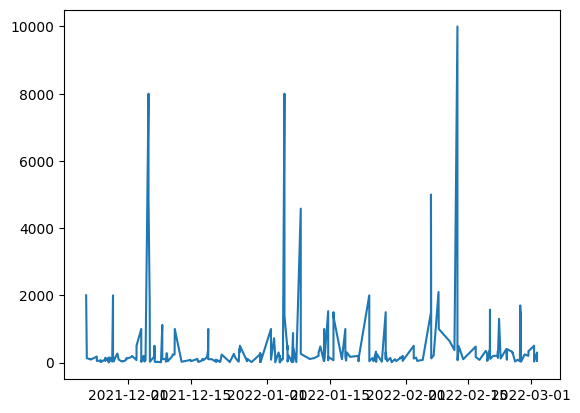

In [75]:
plt.plot(df["Date"],df["INR"])

### Day name wise bar chart

In [76]:
df["M"] = df["Date"].dt.month_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,M
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [77]:
df_m = df.groupby(df["M"])["INR"].sum()
df_m

M
December    28644.44
February    36064.65
January     40320.51
March        1125.00
November     7623.40
Name: INR, dtype: float64

<BarContainer object of 5 artists>

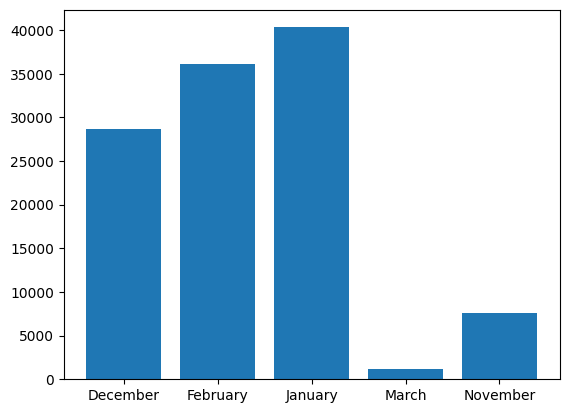

In [78]:
plt.bar(df_m.index,df_m)

### Day name wise bar chart

In [79]:
df["D"] = df["Date"].dt.day_name()
df_d = df.groupby(df["D"])["INR"].sum()
df_d

D
Friday        6910.00
Monday        6248.95
Saturday     34421.02
Sunday       31542.40
Thursday      9570.51
Tuesday      17344.65
Wednesday     7740.47
Name: INR, dtype: float64

<Axes: xlabel='D'>

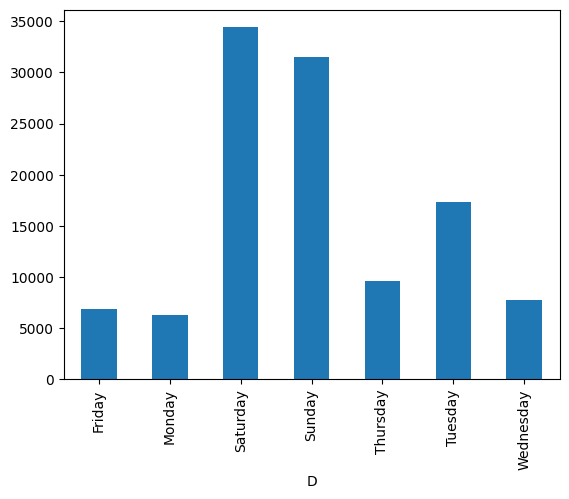

In [80]:
df_d.plot(kind='bar')

In [81]:
### ways to find the name of groups
list(df.groupby(df["D"]).groups)

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [82]:
df.groupby(df["D"]).groups.keys()

dict_keys(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])

### Month end bar chart

<Axes: xlabel='M'>

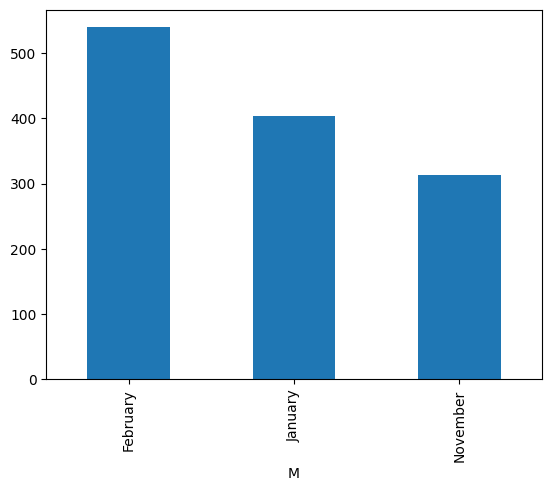

In [83]:
df[df["Date"].dt.is_month_end].groupby(df["M"])["INR"].sum().plot(kind="bar")

# Time Series from Corey Schafer

In [84]:
df1 = pd.read_csv("07/ETH_1h.csv")
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [85]:
df1.shape

(23674, 7)

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [87]:
#df1["Date"] = pd.to_datetime(df1["Date"])

***its gives because it is not in a format that pandas could understand so we use forma attribute to parse***

In [88]:
df1["Date"] = pd.to_datetime(df1["Date"],format="%Y-%m-%d %I-%p")
df1["Date"]

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Open    23674 non-null  float64       
 3   High    23674 non-null  float64       
 4   Low     23674 non-null  float64       
 5   Close   23674 non-null  float64       
 6   Volume  23674 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.3+ MB


**We successfully converted it into datetime dtype**

In [90]:
df1.loc[0,"Date"].day_name()

'Friday'

## Run datetime

we can convert the columns into datetime dtype when reading csv using parse_dates(giving cols in a list to apply a function in which they are formatted)

In [91]:
df = pd.read_csv("07/expense_data.csv",parse_dates=["Date"])
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


**If format is diff then we have to do manually**

In [92]:
df1.loc[0,"Date"]

Timestamp('2020-03-13 20:00:00')

#### Oldest datetime value

In [93]:
df1["Date"].min()

Timestamp('2017-07-01 11:00:00')

#### Latest datetime value

In [94]:
df1["Date"].max()

Timestamp('2020-03-13 20:00:00')

In [95]:
df1["Date"].max()-df1["Date"].min()

Timedelta('986 days 09:00:00')

In [96]:
df1["Date"].min()-df1["Date"].max()

Timedelta('-987 days +15:00:00')

### Filtering

In [97]:
df1[df1["Date"] > "2018"]

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
19263,2018-01-01 05:00:00,ETHUSD,747.90,747.91,739.99,746.89,2693552.60
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37


In [98]:
df1[(df1["Date"] > "2018") & (df1["Date"] < "2019")]

,Date,Symbol,Open,High,Low,Close,Volume
10509,2018-12-31 23:00:00,ETHUSD,130.62,131.36,130.20,130.53,869026.39
10510,2018-12-31 22:00:00,ETHUSD,129.97,131.00,129.07,130.62,1972726.62
10511,2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65
10512,2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69
10513,2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07
...,...,...,...,...,...,...,...
19263,2018-01-01 05:00:00,ETHUSD,747.90,747.91,739.99,746.89,2693552.60
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37


In [99]:
df1[(df1["Date"] > "2018-09-23") & (df1["Date"] < "2019-08-12")]

,Date,Symbol,Open,High,Low,Close,Volume
5157,2019-08-11 23:00:00,ETHUSD,214.88,216.58,214.83,216.06,398950.22
5158,2019-08-11 22:00:00,ETHUSD,214.31,215.57,212.98,214.88,354166.35
5159,2019-08-11 21:00:00,ETHUSD,215.12,215.60,213.40,214.31,505508.79
5160,2019-08-11 20:00:00,ETHUSD,214.98,215.74,214.14,215.12,685926.82
5161,2019-08-11 19:00:00,ETHUSD,215.41,216.12,214.89,214.98,446207.37
...,...,...,...,...,...,...,...
12903,2018-09-23 05:00:00,ETHUSD,240.24,242.50,239.33,241.17,768633.99
12904,2018-09-23 04:00:00,ETHUSD,238.99,240.25,238.99,240.24,376170.94
12905,2018-09-23 03:00:00,ETHUSD,238.18,239.58,238.18,238.99,472826.06
12906,2018-09-23 02:00:00,ETHUSD,238.07,239.44,237.14,238.18,385709.70


In [100]:
df1[(df1["Date"] > pd.to_datetime("2018-09-23")) & (df1["Date"] < pd.to_datetime("2019-08-12"))]

,Date,Symbol,Open,High,Low,Close,Volume
5157,2019-08-11 23:00:00,ETHUSD,214.88,216.58,214.83,216.06,398950.22
5158,2019-08-11 22:00:00,ETHUSD,214.31,215.57,212.98,214.88,354166.35
5159,2019-08-11 21:00:00,ETHUSD,215.12,215.60,213.40,214.31,505508.79
5160,2019-08-11 20:00:00,ETHUSD,214.98,215.74,214.14,215.12,685926.82
5161,2019-08-11 19:00:00,ETHUSD,215.41,216.12,214.89,214.98,446207.37
...,...,...,...,...,...,...,...
12903,2018-09-23 05:00:00,ETHUSD,240.24,242.50,239.33,241.17,768633.99
12904,2018-09-23 04:00:00,ETHUSD,238.99,240.25,238.99,240.24,376170.94
12905,2018-09-23 03:00:00,ETHUSD,238.18,239.58,238.18,238.99,472826.06
12906,2018-09-23 02:00:00,ETHUSD,238.07,239.44,237.14,238.18,385709.70


In [101]:
df1.set_index("Date",inplace=True)
df1

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99


In [111]:
df1.loc["2020"]

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72


In [116]:
#df1.loc["2020-01":"2020-02"]

***It will give error as the index is not in order first we will conert it in order then do it***

In [119]:
df1.sort_index(inplace=True)
df1

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
...,...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [120]:
df1.loc["2020-01":"2020-02"]

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
...,...,...,...,...,...,...
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03


## What is Resampling in Time Series?
Resampling is a time-series operation that involves changing the frequency of your time-indexed data.

In [125]:
highs = df1["High"].resample("D").max()
highs

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [127]:
highs["2020-03-11"]

202.98

<Axes: xlabel='Date'>

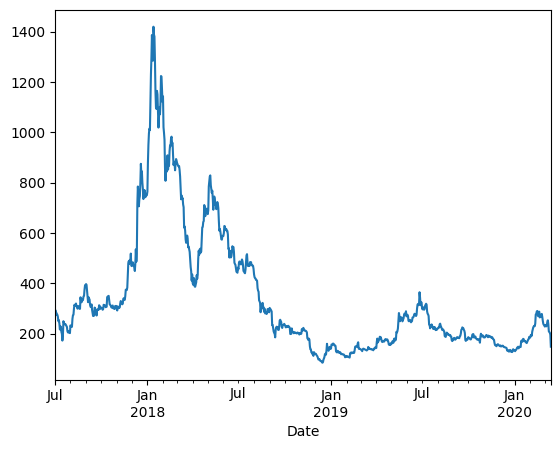

In [128]:
highs.plot()

### Resampling with multiple columns

In [132]:
resampled_df1 = df1.resample("W")
resampled_df1[["Open","High","Low","Close","Volume"]].mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


* ***gives average of every column by week***

#### If we want to apply different agg on different columns we could use agg

In [133]:
resampled_df1.agg({
    "Open":"mean",
    "High":"max",
    "Low":"min",
    "Close":"mean",
    "Volume":"sum"
})

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,293.73,253.23,268.202162,8.084631e+07
2017-07-09,261.337024,285.00,231.25,261.062083,2.246746e+08
2017-07-16,196.193214,240.33,130.26,195.698393,5.017750e+08
2017-07-23,212.351429,249.40,153.25,212.783750,7.221637e+08
2017-07-30,203.496190,229.99,178.03,203.309524,2.657305e+08
...,...,...,...,...,...
2020-02-16,255.021667,290.00,216.31,255.198452,3.912867e+08
2020-02-23,265.220833,287.13,242.36,265.321905,3.067838e+08
2020-03-01,236.720536,278.13,209.26,236.373988,3.693920e+08


### Types of sampling

1. **Down-Sampling**
2. **Up-Sampling**

#### 1. Down-Sampling:
from higher to lower frequency (e.g., daily → monthly)

In [143]:
df1.resample("YS")["High"].mean() #day and month doest matter it is mean of whole year

Date
2017-01-01    354.775251
2018-01-01    484.673551
2019-01-01    181.766612
2020-01-01    199.030543
Freq: YS-JAN, Name: High, dtype: float64

#### 2. Up-Sampling:
from lower to higher frequency (e.g., monthly → daily)



In [156]:
# Up-sample to minutely (will fill with NaN by default)
df1.loc["2020-01-01":"2020-01-01"].resample("T")["High"].mean()

C:\Users\AK\AppData\Local\Temp\ipykernel_8380\15780440.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1.loc["2020-01-01":"2020-01-01"].resample("T")["High"].mean()


Date
2020-01-01 00:00:00    128.54
2020-01-01 00:01:00       NaN
2020-01-01 00:02:00       NaN
2020-01-01 00:03:00       NaN
2020-01-01 00:04:00       NaN
                        ...  
2020-01-01 22:56:00       NaN
2020-01-01 22:57:00       NaN
2020-01-01 22:58:00       NaN
2020-01-01 22:59:00       NaN
2020-01-01 23:00:00    130.27
Freq: min, Name: High, Length: 1381, dtype: float64

In [160]:
# Optionally fill missing data
df1.loc["2020-01-01":"2020-01-01"].resample("min")["High"].mean().ffill()

Date
2020-01-01 00:00:00    128.54
2020-01-01 00:01:00    128.54
2020-01-01 00:02:00    128.54
2020-01-01 00:03:00    128.54
2020-01-01 00:04:00    128.54
                        ...  
2020-01-01 22:56:00    131.41
2020-01-01 22:57:00    131.41
2020-01-01 22:58:00    131.41
2020-01-01 22:59:00    131.41
2020-01-01 23:00:00    130.27
Freq: min, Name: High, Length: 1381, dtype: float64

## Time Shifting and Lagging

Time shifting moves data values forward or backward in time.

In [169]:
dates = pd.date_range('2023-01-01', periods=5, freq='D')
data = pd.Series([10, 20, 30, 40, 50], index=dates)
print("Original:\n",data,sep="")

Original:
2023-01-01    10
2023-01-02    20
2023-01-03    30
2023-01-04    40
2023-01-05    50
Freq: D, dtype: int64


In [170]:
data.shift(1)

2023-01-01     NaN
2023-01-02    10.0
2023-01-03    20.0
2023-01-04    30.0
2023-01-05    40.0
Freq: D, dtype: float64

In [175]:
data.shift(-1)

2023-01-01    20.0
2023-01-02    30.0
2023-01-03    40.0
2023-01-04    50.0
2023-01-05     NaN
Freq: D, dtype: float64

| Use Case                  | Method                 |
| ------------------------- | ---------------------- |
| Find day-to-day change    | `data - data.shift(1)` |
| Predict future using past | Lag features           |
| Detect patterns (trend)   | Use multiple lags      |
| Time delay correlation    | Lagging helps check    |


## Rolling Window Operations (Moving Averages)
Rolling window operations are used to apply a function over a sliding window of your time series data — commonly used for smoothing, trend detection, or volatility analysis.

In [177]:
data = pd.Series(
    [10, 20, 30, 40, 50, 60],
    index=pd.date_range('2023-01-01', periods=6, freq='D')
)
data

2023-01-01    10
2023-01-02    20
2023-01-03    30
2023-01-04    40
2023-01-05    50
2023-01-06    60
Freq: D, dtype: int64

In [179]:
data.rolling(3).mean()

2023-01-01     NaN
2023-01-02     NaN
2023-01-03    20.0
2023-01-04    30.0
2023-01-05    40.0
2023-01-06    50.0
Freq: D, dtype: float64

In [182]:
data.rolling(2).sum()

2023-01-01      NaN
2023-01-02     30.0
2023-01-03     50.0
2023-01-04     70.0
2023-01-05     90.0
2023-01-06    110.0
Freq: D, dtype: float64

In [183]:
data.rolling(window=3).sum()     # Rolling sum

2023-01-01      NaN
2023-01-02      NaN
2023-01-03     60.0
2023-01-04     90.0
2023-01-05    120.0
2023-01-06    150.0
Freq: D, dtype: float64

In [184]:
data.rolling(window=3).std()     # Rolling standard deviation

2023-01-01     NaN
2023-01-02     NaN
2023-01-03    10.0
2023-01-04    10.0
2023-01-05    10.0
2023-01-06    10.0
Freq: D, dtype: float64

In [185]:
data.rolling(window=3).max()     # Rolling max

2023-01-01     NaN
2023-01-02     NaN
2023-01-03    30.0
2023-01-04    40.0
2023-01-05    50.0
2023-01-06    60.0
Freq: D, dtype: float64

In [186]:
data.rolling(window=3).min()     # Rolling min

2023-01-01     NaN
2023-01-02     NaN
2023-01-03    10.0
2023-01-04    20.0
2023-01-05    30.0
2023-01-06    40.0
Freq: D, dtype: float64

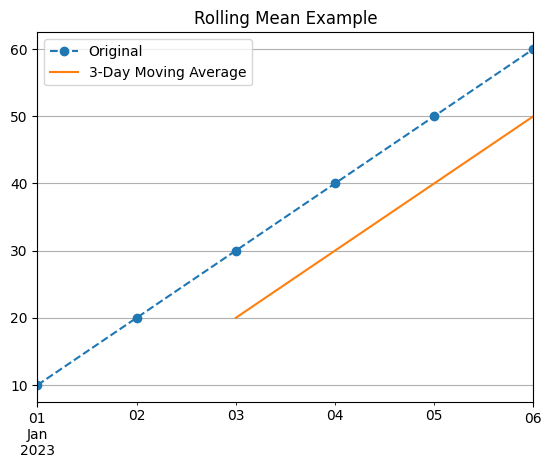

In [189]:
data.plot(label="Original", linestyle="--", marker="o")
data.rolling(window=3).mean().plot(label="3-Day Moving Average")
plt.legend()
plt.title("Rolling Mean Example")
plt.grid(True)
plt.show()

| Goal                           | Use Rolling...                        |
| ------------------------------ | ------------------------------------- |
| Smooth noisy time series       | `rolling().mean()`                    |
| Detect volatility              | `rolling().std()`                     |
| Create lagged features         | `rolling().mean().shift(1)`           |
| Calculate financial indicators | e.g., moving average, Bollinger bands |
